<center>
    <h1>Inteligencia Artificial</h1>
    <h1>Clasificación</h1>
    <h1>Ensemble Learning</h1>
    <br>
    <h5>Prof. Wladimir Rodriguez</h5>
    <h5>wladimir.rodriguez@outlook.com</h5>
    <h5>Departamento de Computación</h5>
</center>

# Combinación de Diferentes Modelos para Aprendizaje en Conjunto (Ensemble Learning)

El objetivo detrás de los métodos de conjunto es combinar diferentes clasificadores en un
meta-clasificador que tiene un mejor rendimiento de generalización que cada clasificador individual por si solo. Por ejemplo, suponiendo que recopilamos las predicciones de 10 expertos,
el aprendizaje en conjunto nos permitiría combinar estratégicamente estas predicciones de los
10 expertos para llegar a una predicción más precisa y robusta que las predicciones de cada experto individual.

Los métodos de conjunto más populares usan el principio de voto por mayoría. El voto por mayoría simplemente significa que seleccionamos la etiqueta de clase que ha sido predicha por la mayoría de los clasificadores, es decir, la que recibió más del 50% de los votos. Estrictamente hablando, el término mayoría de votos se refiere sólo a clases binarias. Sin embargo, es fácil generalizar el principio de voto por mayoría a múltiples clases, que se llama votación por pluralidad. Aquí, seleccionamos la etiqueta de clase que recibió la mayoría de los votos.

Usando el conjunto de entrenamiento, comenzamos entrenando $m$ diferentes clasificadores $(C_1,...,C_m)$.
Dependiendo de la técnica, el conjunto puede ser construido a partir de diferentes algoritmos de clasificación, como por ejemplo, árboles de decisión, máquinas de vectores de soporte, regresión logística, y así sucesivamente. Alternativamente, también podemos usar el mismo algoritmo clasificador de base el cual ajusta diferentes subconjuntos del conjunto de entrenamiento. Un ejemplo destacado de este sería el algoritmo de Random Forest, que combina diferentes clasificadores de árbol de decisión. El siguiente diagrama ilustra el concepto general del enfoque de aprendizaje por conjuntos usando voto por mayoría:

<img src="../figuras/Votacion.png" width=75%>

Para predecir la etiqueta de clase a través de una mayoría simple o pluralidad de votos, combinamos las
prediciones de las etiquetas de clase de cada clasificador individual $C_j$ y seleccione como la etiqueta de clase la que recibió la mayoría de los votos:

$$\hat{y}=moda\{C_1(x),C_2(x),\dots,C_m(x)\}$$

Por ejemplo, en una tarea de clasificación binaria donde clase1 = -1 y class2 = +1, podemos
escriba la predicción del voto mayoritario como sigue:

$$C(x)=signo[\sum_{j}^{m}C_j(x)]=\left\{
\begin{array}{ll}
      1 & \sum_{i}C_j(x) \geq 0 \\
      0 & de\ lo\ contrario \\
\end{array} 
\right.$$

## Bagging - construcción de un conjunto de clasificadores a partir de muestras de bootstrap

El "Bagging" es una técnica de aprendizaje por conjunto que está estrechamente relacionado al del voto por mayoría, como se ilustra en el siguiente diagrama:

<img src="../figuras/bagging.png" width=75%>

Sin embargo, en lugar de usar el mismo conjunto de entrenamiento para entrenar al conjunto de clasificadores, tomamos muestras de "bootstrap" (muestras aleatorias con reemplazo) del conjunto de entrenamiento inicial, por lo que el "bagging" también se conoce como "bootstrap aggegating".

## Ejemplo de un Clasificador usando Bagging

Crear un clasificador Bagging usando el conjunto de datos **wine**. En este ejemplo solo usaremos las clases de vino 2 y 3, y seleccionaremos dos atributos: Alcohol y Hue.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import pandas as pd

vinos = pd.read_csv('../datos/wine_data.csv')
vinos.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
vinos = vinos[vinos['Class label'] != 1]
X = vinos[['Alcohol', 'Hue']].values
y = vinos['Class label'].values

Codificar las etiquetas de clases a un formato binario y dividir el conjunto de datos, con un 60% de entrenamiento y un 40% de prueba:

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()
y = le.fit_transform(y)
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.40, random_state=1)

Sklearn tiene una implemantación del algoritmo de clasificación Bagging, el cual se puede importar del submodulo `ensemble`. Usaremos un árbol de decisión como clasificador base y crearemos 500 árboles de decisión entrenados con diferentes "bootstrap" muestras del conjunto e entrenamiento:

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier(criterion='entropy')
clasificador_bagging = BaggingClassifier(base_estimator=arbol, n_estimators=500, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, random_state=1)

Calcular la exactitud de las prediciones tanto sobre el conjunto de entrenamiento como sobre el conjunto de prueba, para comparar el rendimiento del clasificador Bagging como del Earbol de decisión:

In [7]:
from sklearn.metrics import accuracy_score
arbol = arbol.fit(X_entrenamiento, y_entrenamiento)
y_entrenamiento_predicciones = arbol.predict(X_entrenamiento)
y_prueba_predicciones = arbol.predict(X_prueba)
arbol_entrenamiento = accuracy_score(y_entrenamiento, y_entrenamiento_predicciones)
arbol_prueba = accuracy_score(y_prueba, y_prueba_predicciones)
print('Exactitud del Árbol de Decisión entrenamiento/prueba %.3f/%.3f' % (arbol_entrenamiento, arbol_prueba))

Exactitud del Árbol de Decisión entrenamiento/prueba 1.000/0.833


En función de los valores de precisión obtenidos, el árbol de decisión sin podar predice correctamente todas las etiquetas de clase de las muestras de entrenmiento; sin embargo, la precisión de los datos de prueba es sustancialmente más baja indicando una varianza alta del modelo (sobreajuste):

In [8]:
clasificador_bagging = clasificador_bagging.fit(X_entrenamiento, y_entrenamiento)
y_entrenamiento_predicciones = clasificador_bagging.predict(X_entrenamiento)
y_prueba_predicciones = clasificador_bagging.predict(X_prueba)
clasificador_bagging_entrenamiento = accuracy_score(y_entrenamiento, y_entrenamiento_predicciones)
clasificador_bagging_prueba = accuracy_score(y_prueba, y_prueba_predicciones)
print('Exactitud del Clasificador Bagging entrenamiento/prueba %.3f/%.3f' % (clasificador_bagging_entrenamiento, clasificador_bagging_prueba))

Exactitud del Clasificador Bagging entrenamiento/prueba 1.000/0.896


Aunque las precisiones de entrenamiento del árbol de decisión y el clasificador bagging son similares en el conjunto de entrenamiento (ambos 1.0), podemos ver que el clasificador bagging generaliza ligeramente mejor sobre el conjunto de prueba. Comparar las regiones de decisión entre el árbol de decisión y el clasificador bagging:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


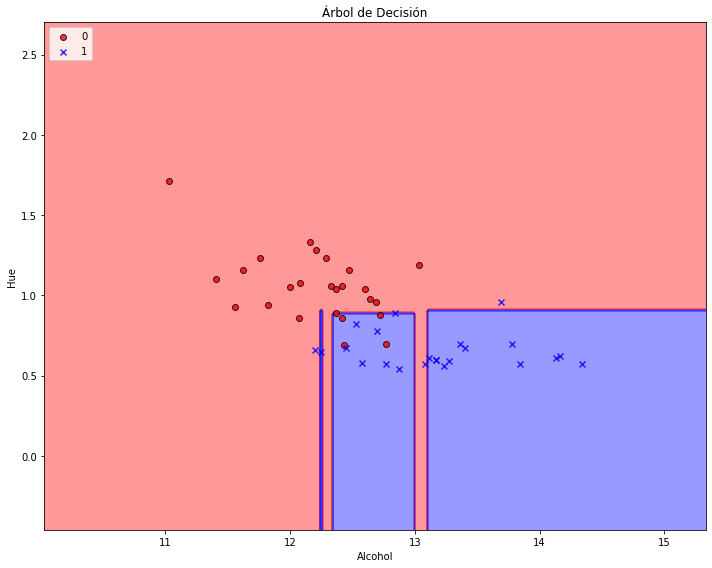

In [9]:
import graficar_regiones_decision as grd
grd.graficar_regiones_decision(X_prueba, y_prueba, 
                      clasificador=arbol)
plt.title('Árbol de Decisión')
plt.xlabel('Alcohol')
plt.ylabel('Hue')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


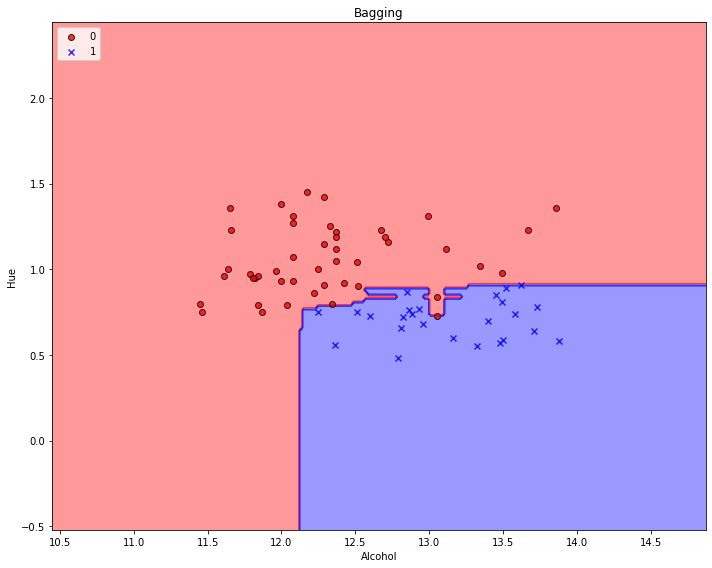

In [10]:
grd.graficar_regiones_decision(X_entrenamiento, y_entrenamiento, 
                      clasificador=clasificador_bagging)
plt.title('Bagging')
plt.xlabel('Alcohol')
plt.ylabel('Hue')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Random Forrest

El algoritmo Random Forrest ha ganado gran popularidad en aplicaciones de aprendizaje automático
durante la última década debido a su buen desempeño de clasificación, escalabilidad y
facilidad de uso. Intuitivamente, un Random Forrest puede considerarse como un conjunto de 
árboles de decisiones. La idea detrás del aprendizaje por conjuntos es combinar clasificaores débiles para construir un modelo más robusto, un clasificador fuerte, que tiene un mejor error de generalización y es menos susceptible de sobreajuste. El algoritmo de Random Forrest se puede resumir en cuatro pasos simples:
1. Extraer una muestra aleatoria bootstrap de tamaño $n$ (elejir aleatoriamente $n$ muestras de
el conjunto de entrenamiento con reemplazo).
2. Generar un árbol de decisión a partir de la muestra de arranque. En cada nodo:
  1. Seleccione aleatoriamente $d$ atributos sin reemplazo.
  2. Divida el nodo utilizando el atributo que proporciona la mejor división de acuerdo con la función objetivo, por ejemplo, maximizando la ganancia de información.
3. Repita los pasos 1 y 2 $k$ veces.
4. Totalizar la predicción de cada árbol para asignar la etiqueta de clase por voto mayoritario

### Ejemplo de Random Forrest

In [11]:
from sklearn.ensemble import RandomForestClassifier
bosque = RandomForestClassifier(criterion='entropy', n_estimators=100,random_state=1)
bosque = bosque.fit(X_entrenamiento, y_entrenamiento)
y_entrenamiento_predicciones = bosque.predict(X_entrenamiento)
y_prueba_predicciones = bosque.predict(X_prueba)
bosque_entrenamiento = accuracy_score(y_entrenamiento, y_entrenamiento_predicciones)
bosque_prueba = accuracy_score(y_prueba, y_prueba_predicciones)
print('Exactitud del Random Forest entrenamiento/prueba %.3f/%.3f' % (bosque_entrenamiento, bosque_prueba))

Exactitud del Random Forest entrenamiento/prueba 1.000/0.896


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


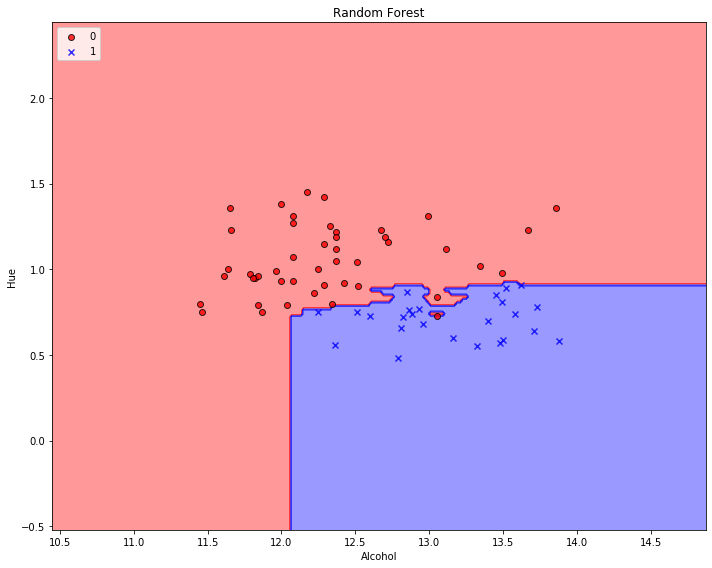

In [12]:
grd.graficar_regiones_decision(X_entrenamiento, y_entrenamiento, 
                      clasificador=bosque)
plt.title('Random Forest')
plt.xlabel('Alcohol')
plt.ylabel('Hue')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Boosting

Comencemos con la definición intuitiva del concepto:
- Boosting (Freud y Shapire, 1996) - Algoritmo que permite ajustar muchos clasificadores débiles a versiones ponderadas de los datos de entrenamiento. Clasificando los ejemplos finales por mayoría de votos.

Al usar la tecnología de boosting, a todas las instancias en el conjunto de datos se les asigna una puntuación que indica qué tan difíciles de clasificar son. En cada iteración siguiente, el algoritmo presta más atención (asigna pesos más grandes) a instancias que fueron clasificadas erróneamente previamente.

<img src="../figuras/Boosting.png" width=75%>

En boosting, el conjunto consta de clasificadores básicos muy simples, también a menudo referidos como clasificadore débiles, que tienen solo una ligera ventaja de rendimiento sobre adivinar al azar. Un ejemplo típico de un clasificador débil sería un pedazo de un árbol de decisión.
El concepto clave detrás del boosting es centrarse en las muestras de entrenaminetoque son difíciles de clasificar, es decir, dejar que los clasificadores débiles aprendan posteriormente de los errores de clasificación
sobre las uestras de entrenamiento para mejorar el rendimiento del conjunto. En contraste con el bagging, la formulación inicial de boosting, el algoritmo utiliza subconjuntos aleatorios de las muestras de entrenamiento extraídas del conjunto de datos de entrenamiento sin reemplazo. El procedimiento original de boosting, se resume en cuatro pasos claves de la siguiente manera:

1. Extraer un subconjunto aleatorio de muestras de entrenamiento $d_1$ sin reemplazo del conjunto de entrenamiento $D$ para entrenar a un clasificador débil $C_1$.
2. Extraer un segundo subconjunto de entrenamiento aleatorio $d_2$ sin reemplazo del conjunto de entrenamiento y agregue el 50 por ciento de las muestras que fueron previamente mal clasificadas para entrenar a un clasificador débil $C_2$.
3. Encuentre las muestras de entrenamiento $d_3$ en el conjunto de entrenamiento $D$ en el cual $C_1$ y $C_2$ no estan de acuerdo para entrenar a un tercer clasificador débil $C_3$.
4. Combine los clasificadores débiles $C_1$, $C_2$ y $C_3$ por mayoría de votos.

## AdaBoost

El algoritmo AdaBoost (adaptive boosting) fue propuesto en 1995 por Yoav Freund y Robert Shapire como un método general para generar un clasificador fuerte a partir de un conjunto de clasificadores débiles. AdaBoost funciona incluso cuando los clasificadores provienen de un continuo de clasificadores potenciales (como redes neuronales, discriminantes lineales, etc.)

En contraste con el procedimiento original de boosting, AdaBoost utiliza
el conjunto completo de entrenamiento para entrenar a los clasificadores débiles donde las muestras de entrenamiento son reponderadas en cada iteración para construir un clasificador fuerte que aprenda de los errores del conjunto de los clasificadores débiles anteriores.

<img src="../figuras/AdaBoost.png" width=75%>

### Ejemplo usando AdaBoost

In [13]:
from sklearn.ensemble import AdaBoostClassifier
arbol = DecisionTreeClassifier(criterion='entropy', max_depth=1)
ada = AdaBoostClassifier(base_estimator=arbol, n_estimators=500, learning_rate=0.1, random_state=1)
arbol = arbol.fit(X_entrenamiento, y_entrenamiento)
y_entrenamiento_predicciones = arbol.predict(X_entrenamiento)
y_prueba_predicciones = arbol.predict(X_prueba)
arbol_entrenamiento = accuracy_score(y_entrenamiento, y_entrenamiento_predicciones)
arbol_prueba = accuracy_score(y_prueba, y_prueba_predicciones)
print('Exactitud del Árbol de Decisión entrenamiento/prueba %.3f/%.3f' % (arbol_entrenamiento, arbol_prueba))

Exactitud del Árbol de Decisión entrenamiento/prueba 0.845/0.854


In [14]:
ada = ada.fit(X_entrenamiento, y_entrenamiento)
y_entrenamiento_predicciones = ada.predict(X_entrenamiento)
y_prueba_predicciones = ada.predict(X_prueba)
ada_entrenamiento = accuracy_score(y_entrenamiento, y_entrenamiento_predicciones)
ada_prueba = accuracy_score(y_prueba, y_prueba_predicciones)
print('Exactitud del AdaBoost entrenamiento/prueba %.3f/%.3f' % (ada_entrenamiento, ada_prueba))

Exactitud del AdaBoost entrenamiento/prueba 1.000/0.875


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


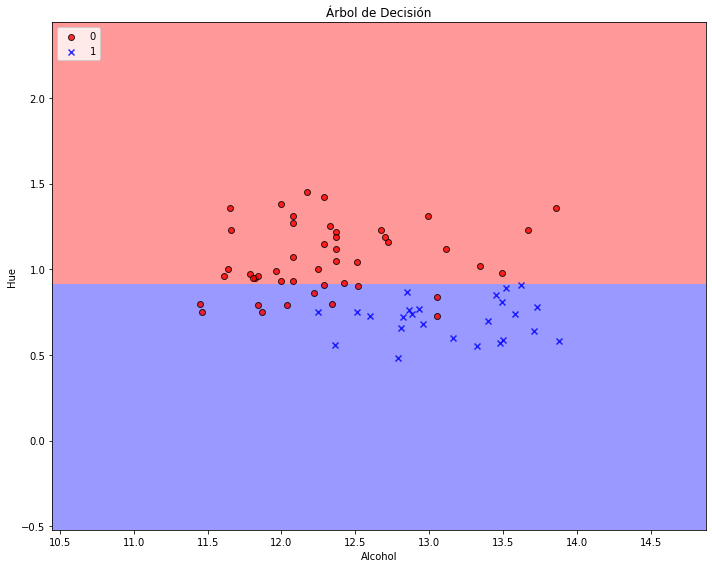

In [15]:
grd.graficar_regiones_decision(X_entrenamiento, y_entrenamiento, 
                      clasificador=arbol)
plt.title('Árbol de Decisión')
plt.xlabel('Alcohol')
plt.ylabel('Hue')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


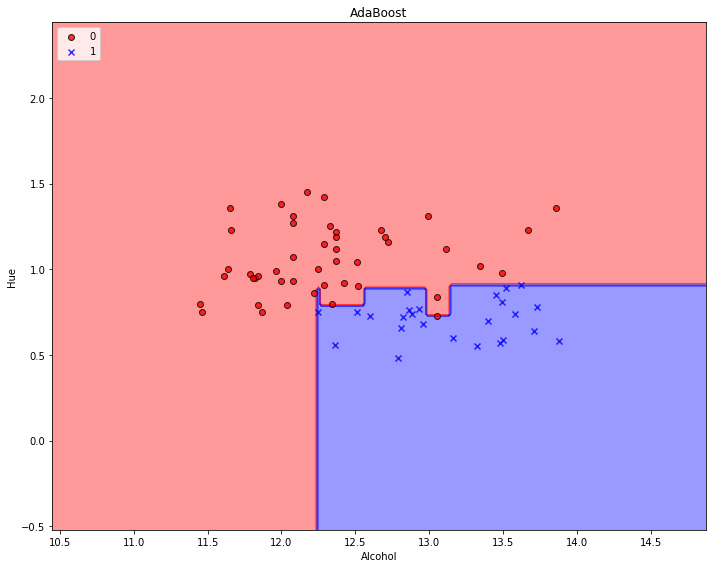

In [16]:
grd.graficar_regiones_decision(X_entrenamiento, y_entrenamiento, 
                      clasificador=ada)
plt.title('AdaBoost')
plt.xlabel('Alcohol')
plt.ylabel('Hue')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()